In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import numpy as np
import matplotlib.ticker as ticker

In [2]:
alberta_df = pd.read_csv("Output/alberta.csv")
british_columbia_df=pd.read_csv("Output/britishcolumbia.csv")
manitoba_df=pd.read_csv("Output/manitoba.csv")
newbrunswick_df=pd.read_csv("Output/newbrunswick.csv")
newfoundland_df=pd.read_csv("Output/newfoundland.csv")
northwestter_df=pd.read_csv("Output/northwestter.csv")
novascotia_df=pd.read_csv("Output/novascotia.csv")
nunavat_df=pd.read_csv("Output/nunavat.csv")
ontario_df=pd.read_csv("Output/ontario.csv")
princeedward_df=pd.read_csv("Output/princeedward.csv")
quebec_df=pd.read_csv("Output/quebec.csv")
saskatchewan_df=pd.read_csv("Output/saskatchewan.csv")
yukon_df=pd.read_csv("Output/yukon.csv")


In [3]:
merged_df = pd.concat([alberta_df, british_columbia_df, manitoba_df, newbrunswick_df, 
                       newfoundland_df, northwestter_df, novascotia_df, nunavat_df, 
                       ontario_df, princeedward_df, quebec_df, saskatchewan_df, yukon_df])

merged_df

,Unnamed: 0,Date,Province,Vaccine dose 1,Booster vaccine 2,Booster vaccine 3,Booster vaccine 4,Total vaccine,Vaccine coverage dose 1,Vaccine coverage booster 2,Vaccine coverage booster 3,Vaccine coverage booster 4,Cases,Deaths,Hospitalizations,ICU,Tests Completed,Deaths.1
0,0,2020-12-14,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1342.0,11.0,35.0,0.0,16468.0,NaN
1,1,2020-12-15,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1287.0,16.0,26.0,1.0,17645.0,NaN
2,2,2020-12-16,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1592.0,30.0,7.0,2.0,19960.0,NaN
3,3,2020-12-17,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1461.0,25.0,14.0,-1.0,19672.0,NaN
4,4,2020-12-18,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1368.0,26.0,-4.0,3.0,18664.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,836,2023-03-30,YT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
837,837,2023-03-31,YT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
838,838,2023-04-01,YT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
839,839,2023-04-02,YT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
merged_df.columns
merged_df.dtypes

Unnamed: 0                      int64
Date                           object
Province                       object
Vaccine dose 1                float64
Booster vaccine 2             float64
Booster vaccine 3             float64
Booster vaccine 4             float64
Total vaccine                 float64
Vaccine coverage dose 1       float64
Vaccine coverage booster 2    float64
Vaccine coverage booster 3    float64
Vaccine coverage booster 4    float64
Cases                         float64
Deaths                        float64
Hospitalizations              float64
ICU                           float64
Tests Completed               float64
Deaths.1                      float64
dtype: object

In [5]:
#Are there values below 0, API instructions say to get rid of them.
print(merged_df[['Vaccine dose 1','Booster vaccine 2','Booster vaccine 2', 'Booster vaccine 3', 'Booster vaccine 4', 
              'Total vaccine', 'Vaccine coverage dose 1', 'Vaccine coverage booster 2', 
              'Vaccine coverage booster 3', 'Vaccine coverage booster 4', 'Cases', 'Deaths', 
              'Hospitalizations', 'ICU', 'Tests Completed',]].min())


Vaccine dose 1                 -7031.0
Booster vaccine 2              -4153.0
Booster vaccine 2              -4153.0
Booster vaccine 3            -836968.0
Booster vaccine 4                 -5.0
Total vaccine                  -7560.0
Vaccine coverage dose 1           -9.1
Vaccine coverage booster 2        -5.9
Vaccine coverage booster 3        -9.6
Vaccine coverage booster 4        -0.1
Cases                             -4.0
Deaths                           -12.0
Hospitalizations                -314.0
ICU                              -34.0
Tests Completed                    0.0
dtype: float64


In [6]:
# list of columns to replace values below 0 with NaN
cols_to_replace = ['Vaccine dose 1', 'Booster vaccine 2', 'Booster vaccine 3', 'Booster vaccine 4', 
                   'Total vaccine', 'Vaccine coverage dose 1', 'Vaccine coverage booster 2', 
                   'Vaccine coverage booster 3', 'Vaccine coverage booster 4', 'Cases', 'Deaths', 
                   'Hospitalizations', 'ICU', 'Tests Completed']

# replace values below 0 with NaN using applymap method
merged_df[cols_to_replace] = merged_df[cols_to_replace].applymap(lambda x: x if x >= 0 else pd.np.nan)

/var/folders/xq/xdbqztz92zs24q39hvzwj65m0000gn/T/ipykernel_28495/2044851154.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  merged_df[cols_to_replace] = merged_df[cols_to_replace].applymap(lambda x: x if x >= 0 else pd.np.nan)


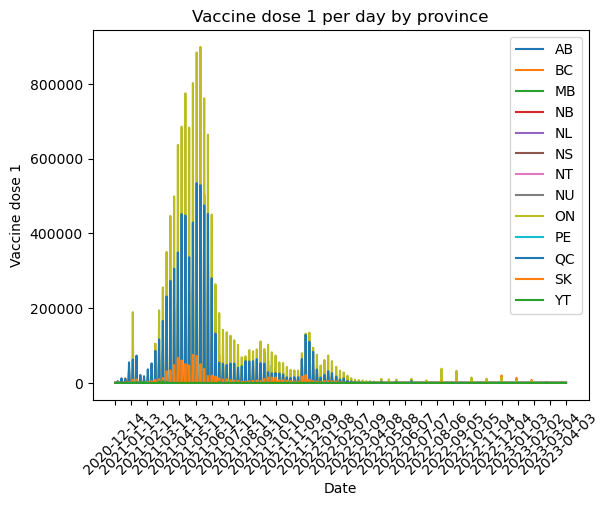

In [7]:
Line_plot_df = merged_df.loc[:, ['Province', 'Date', 'Vaccine dose 1']]

# sort by province and date
Line_plot_df = Line_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Line_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Vaccine dose 1'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Vaccine dose 1')
plt.title('Vaccine dose 1 per day by province')
plt.legend()
xticks = plt.gca().get_xticks()
plt.xticks(xticks[::30]) # show only xticks for every 30 days
# show the plot
plt.show()

In [8]:
def plot_vaccine_dose_by_province(merged_df, vaccine_dose):
    # select relevant columns
    line_plot_df = merged_df.loc[:, ['Province', 'Date', vaccine_dose]]
    # sort by province and date
    line_plot_df = line_plot_df.sort_values(['Province', 'Date'])
    # create a separate plot for each province
    for province, group in line_plot_df.groupby('Province'):
        # plot Date vs Vaccine dose per day
        plt.plot(group['Date'], group[vaccine_dose], label=province)
    # add labels and legend
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel(vaccine_dose)
    plt.title(f'{vaccine_dose} per day by province')
    plt.legend()
    xticks = plt.gca().get_xticks()
    plt.xticks(xticks[::30]) # show only xticks for every 30 days
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))
    # show the plot
    plt.show()
    

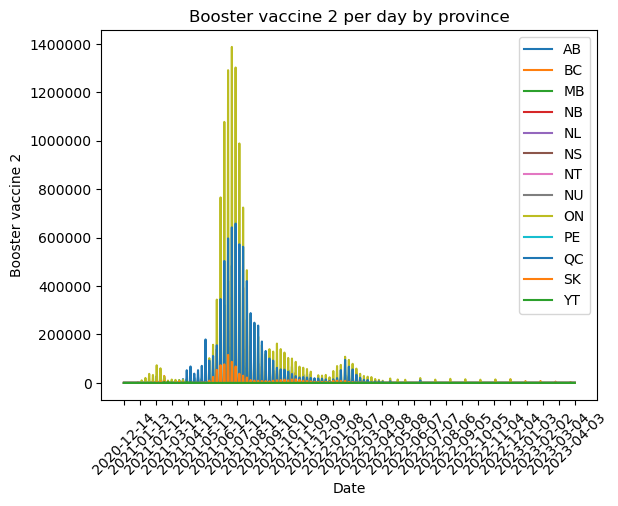

In [9]:
plot_vaccine_dose_by_province(merged_df, 'Booster vaccine 2')

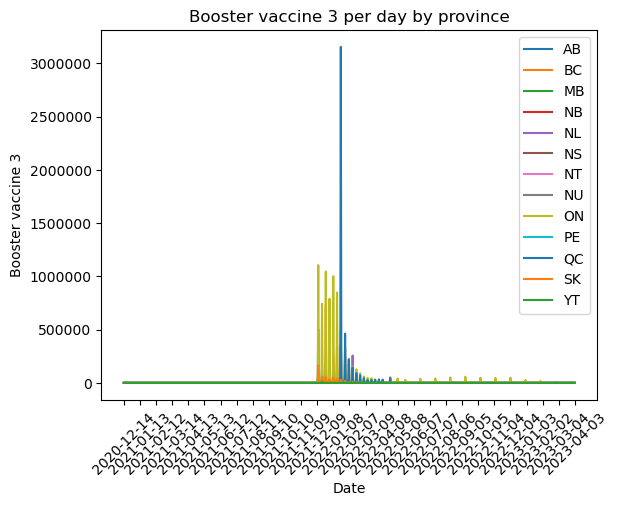

In [10]:
plot_vaccine_dose_by_province(merged_df, 'Booster vaccine 3')

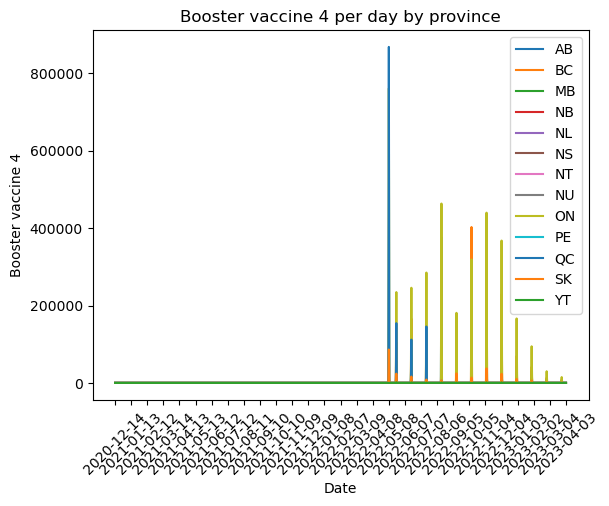

In [11]:
plot_vaccine_dose_by_province(merged_df, 'Booster vaccine 4')

# Data grouped by date

In [12]:
by_date_df=merged_df.groupby("Date")[['Date'
                                      ,'Vaccine dose 1'
                                        , 'Booster vaccine 2'
                                        , 'Booster vaccine 3'
                                        , 'Booster vaccine 4'
                                        , 'Total vaccine'
                                        ,'Cases'
                                        , 'Deaths'
                                        , 'Hospitalizations'
                                        , 'ICU'
                                        , 'Tests Completed']]

by_date_df.sample(10)

,Date,Vaccine dose 1,Booster vaccine 2,Booster vaccine 3,Booster vaccine 4,Total vaccine,Cases,Deaths,Hospitalizations,ICU,Tests Completed
0,2020-12-14,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,21.0
0,2020-12-14,0.0,0.0,0.0,0.0,0.0,1686.0,34.0,10.0,NaN,26203.0
0,2020-12-14,0.0,0.0,0.0,0.0,0.0,267.0,2.0,7.0,4.0,2455.0
0,2020-12-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0
0,2020-12-14,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1711.0
...,...,...,...,...,...,...,...,...,...,...,...
840,2023-04-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
840,2023-04-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
840,2023-04-03,0.0,0.0,0.0,0.0,0.0,51.0,10.0,0.0,0.0,618.0
840,2023-04-03,0.0,0.0,0.0,0.0,0.0,274.0,2.0,0.0,0.0,0.0


In [14]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x=by_date_df["Vaccine dose 1"], y=by_date_df["Hospitalizations"])
    
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#     # Plot
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
#     plt.xlabel("smth")
#     plt.ylabel(smth)
#     print(f"The r-value is: {rvalue**2}")
#     plt.show()
    


<AxesSubplot:ylabel='Date-None'>

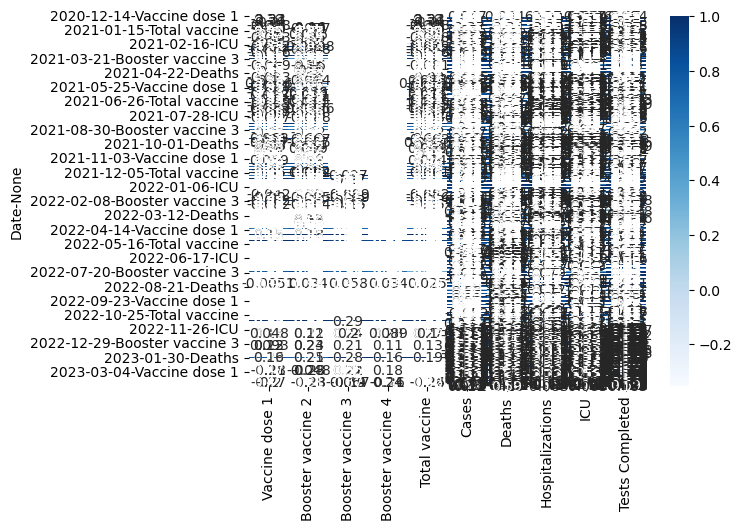

In [15]:
import seaborn as sb
sb.heatmap(by_date_df.corr(),cmap="Blues",annot=True)

In [16]:
by_date_df.corr()

Vaccine dose 1  Booster vaccine 2  \
Date                                                              
2020-12-14 Vaccine dose 1                NaN                NaN   
           Booster vaccine 2             NaN                NaN   
           Booster vaccine 3             NaN                NaN   
           Booster vaccine 4             NaN                NaN   
           Total vaccine                 NaN                NaN   
...                                      ...                ...   
2023-04-03 Cases                         NaN                NaN   
           Deaths                        NaN                NaN   
           Hospitalizations              NaN                NaN   
           ICU                           NaN                NaN   
           Tests Completed               NaN                NaN   

                              Booster vaccine 3  Booster vaccine 4  \
Date                                                                 
2020-12-14 Vaccine dose 1                   NaN                NaN   
           Booster vaccine 2                NaN                NaN   
           Booster vaccine 3                NaN                NaN   
           Booster vaccine 4                NaN                NaN   
           Total vaccine                    NaN                NaN   
...                                         ...                ...   
2023-04-03 Cases                            NaN                NaN   
           Deaths                           NaN                NaN   
           Hospitalizations                 NaN                NaN   
           ICU                              NaN                NaN   
           Tests Completed                  NaN                NaN   

                              Total vaccine     Cases    Deaths  \
Date                                                              
2020-12-14 Vaccine dose 1               NaN       NaN       NaN   
           Booster vaccine 2            NaN       NaN       NaN   
           Booster vaccine 3            NaN       NaN       NaN   
           Booster vaccine 4            NaN       NaN       NaN   
           Total vaccine                NaN       NaN       NaN   
...                                     ...       ...       ...   
2023-04-03 Cases                        NaN  1.000000  0.225112   
           Deaths                       NaN  0.225112  1.000000   
           Hospitalizations             NaN -0.110654 -0.134636   
           ICU                          NaN -0.110654 -0.134636   
           Tests Completed              NaN  0.091450  0.594643   

                              Hospitalizations       ICU  Tests Completed  
Date                                                                       
2020-12-14 Vaccine dose 1                  NaN       NaN              NaN  
           Booster vaccine 2               NaN       NaN              NaN  
           Booster vaccine 3               NaN       NaN              NaN  
           Booster vaccine 4               NaN       NaN              NaN  
           Total vaccine                   NaN       NaN              NaN  
...                                        ...       ...              ...  
2023-04-03 Cases                     -0.110654 -0.110654         0.091450  
           Deaths                    -0.134636 -0.134636         0.594643  
           Hospitalizations           1.000000  1.000000        -0.083333  
           ICU                        1.000000  1.000000        -0.083333  
           Tests Completed           -0.083333 -0.083333         1.000000  

[8410 rows x 10 columns]